In [36]:
import pandas as pd
import numpy as np

In [43]:
spectra = pd.read_csv('../data/mini_batch_spectra.csv')

spectra

,Unnamed: 0,wavelength,spectrum0,spectrum1,spectrum2,spectrum3,spectrum4,spectrum5,spectrum6,spectrum7,...,spectrum274,spectrum275,spectrum276,spectrum277,spectrum278,spectrum279,spectrum280,spectrum281,spectrum282,spectrum283
0,0,648.100565,0.543322,0.542366,0.543633,0.543713,0.543715,0.543792,0.542668,0.542695,...,0.543576,0.542865,0.542033,0.543478,0.543616,0.543684,0.541247,0.543882,0.543616,0.543547
1,1,648.122168,0.985357,0.979836,0.991712,0.993859,0.995291,0.995355,0.984540,0.981506,...,0.989563,0.989150,0.983378,0.989285,0.992077,0.993459,0.980867,0.996246,0.992505,0.989541
2,2,648.143773,0.979218,0.984725,0.989704,0.992706,0.997501,0.995514,0.988185,0.981842,...,0.985280,0.993950,0.989227,0.986720,0.991056,0.993222,0.990154,0.995485,0.992034,0.986187
3,3,648.165378,0.994482,0.991320,0.994120,0.994369,0.997361,0.995906,0.992805,0.990931,...,0.995470,0.994361,0.991909,0.995389,0.994050,0.996387,0.989006,0.996894,0.994674,0.994624
4,4,648.186984,0.995797,0.994860,0.997077,0.997276,0.998847,0.998266,0.995817,0.994543,...,0.996877,0.997188,0.994366,0.996403,0.997153,0.998092,0.992583,0.998472,0.997469,0.996820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,1167,673.808410,0.996779,0.996076,0.996425,0.999611,0.999088,0.999647,0.992946,0.996424,...,0.996046,0.997031,0.992860,0.998945,0.999438,0.999584,0.985182,0.999808,0.999003,0.997245
1168,1168,673.830870,0.962744,0.953092,0.970704,0.979645,0.986492,0.984231,0.958075,0.951276,...,0.967376,0.972502,0.955554,0.973335,0.973412,0.980995,0.946171,0.986159,0.974728,0.970586
1169,1169,673.853332,0.952193,0.952650,0.970637,0.977509,0.988826,0.984480,0.962478,0.947693,...,0.963015,0.976057,0.960595,0.966364,0.971695,0.979366,0.960191,0.985262,0.974143,0.965421
1170,1170,673.875794,0.977591,0.982639,0.988415,0.991486,0.997313,0.995122,0.986417,0.979707,...,0.983597,0.992766,0.985677,0.985084,0.990103,0.992496,0.985010,0.994857,0.991031,0.984748


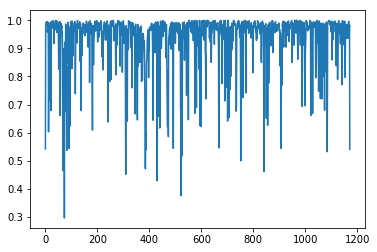

In [46]:
import matplotlib.pyplot as plt

plt.plot(spectra['spectrum1'])

In [38]:
spectra = spectra.to_numpy()
print(spectra.shape)
spectra = spectra[:, 1:]

(1172, 286)


In [39]:
print(spectra.shape)

(1172, 285)


In [31]:
spectra[:,0]

array([648.10056463, 648.1221683 , 648.1437727 , ..., 673.85333162,
       673.87579374, 673.8982566 ])

In [42]:
np.savetxt('../data/mini_batch_spectra_clean.csv', spectra)